In [1]:
import pandas as pd, numpy as np, requests, os, matplotlib.pyplot as plt, seaborn as sns

from pathlib import Path

In [2]:
#~ setting up project directories 

PROJECT_ROOT = Path.cwd().resolve().parents[0]

DATA_DIR = PROJECT_ROOT / 'data' 

RAW_DIR = DATA_DIR / 'raw'

PROCESSED_DIR = DATA_DIR / 'processed'

In [ ]:

#~~ parquet loading cleaned dataframes for each dataset

bixi_trip_df = pd.read_parquet(PROCESSED_DIR/'bixi_trip_data.parquet')

weather_df = pd.read_parquet(PROCESSED_DIR/'weather_data.parquet')

stations_status_df = pd.read_parquet(PROCESSED_DIR/'bixi_stations_data.parquet')

In [4]:

'''function for quick description of dataframe'''
def explore_data(df):
    print("Dataframe Shape:", df.shape)
    print("\nDataframe Info:")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nStatistical Summary:\n", df.describe())
    print("\nFirst 5 Rows:\n", df.head())


# BIXI Stations Status DataFrame EDA

In [5]:

explore_data(stations_status_df)

Dataframe Shape: (239, 5)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  239 non-null    object 
 1   name        239 non-null    object 
 2   lat         239 non-null    float64
 3   lon         239 non-null    float64
 4   capacity    239 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.5+ KB
None

Missing Values:
 station_id    0
name          0
lat           0
lon           0
capacity      0
dtype: int64

Statistical Summary:
               lat         lon    capacity
count  239.000000  239.000000  239.000000
mean    45.516834  -73.579330   23.719665
std      0.033080    0.027722    9.367882
min     45.446505  -73.667162   11.000000
25%     45.496849  -73.597764   19.000000
50%     45.515868  -73.573338   21.000000
75%     45.537172  -73.562035   27.000000
max     45.630686  -73.494847

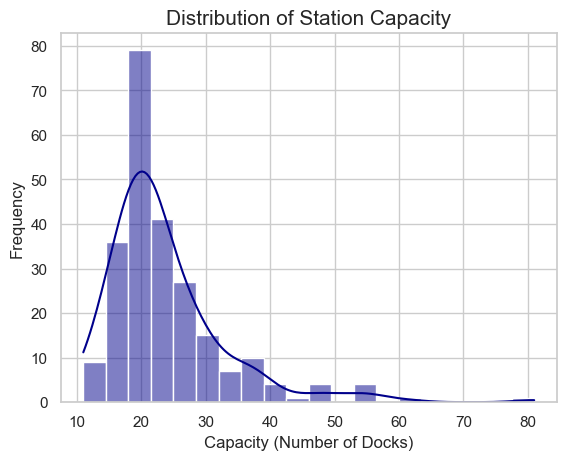

In [6]:

#~ distribution of station capacitites: 

sns.set_theme(style="whitegrid")
sns.histplot(stations_status_df['capacity'], color='darkblue', kde=True, bins=20)
plt.title('Distribution of Station Capacity', fontsize=15)
plt.xlabel('Capacity (Number of Docks)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

Exploratory Data Analysis for station_status_df: 

There are a total of 240 BIXI stations.  

For the capacity, it seems a majority of the number of docks per stations is more than 15 and less than 25 docks. 

It seems there is only one station that has 80 docks. 

# Weather DataFrame EDA

In [7]:
explore_data(weather_df) 

Dataframe Shape: (17521, 4)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           17521 non-null  datetime64[ns]
 1   temperature    17521 non-null  Float64       
 2   precipitation  17521 non-null  Float64       
 3   wind_speed     17521 non-null  Float64       
dtypes: Float64(3), datetime64[ns](1)
memory usage: 599.0 KB
None

Missing Values:
 time             0
temperature      0
precipitation    0
wind_speed       0
dtype: int64

Statistical Summary:
                       time  temperature  precipitation  wind_speed
count                17521      17521.0        17521.0     17521.0
mean   2024-01-01 00:00:00     9.403544       0.135643    5.713823
min    2023-01-01 00:00:00        -28.8            0.0         0.0
25%    2023-07-02 12:00:00          0.8            0.0         3.0
50%    202

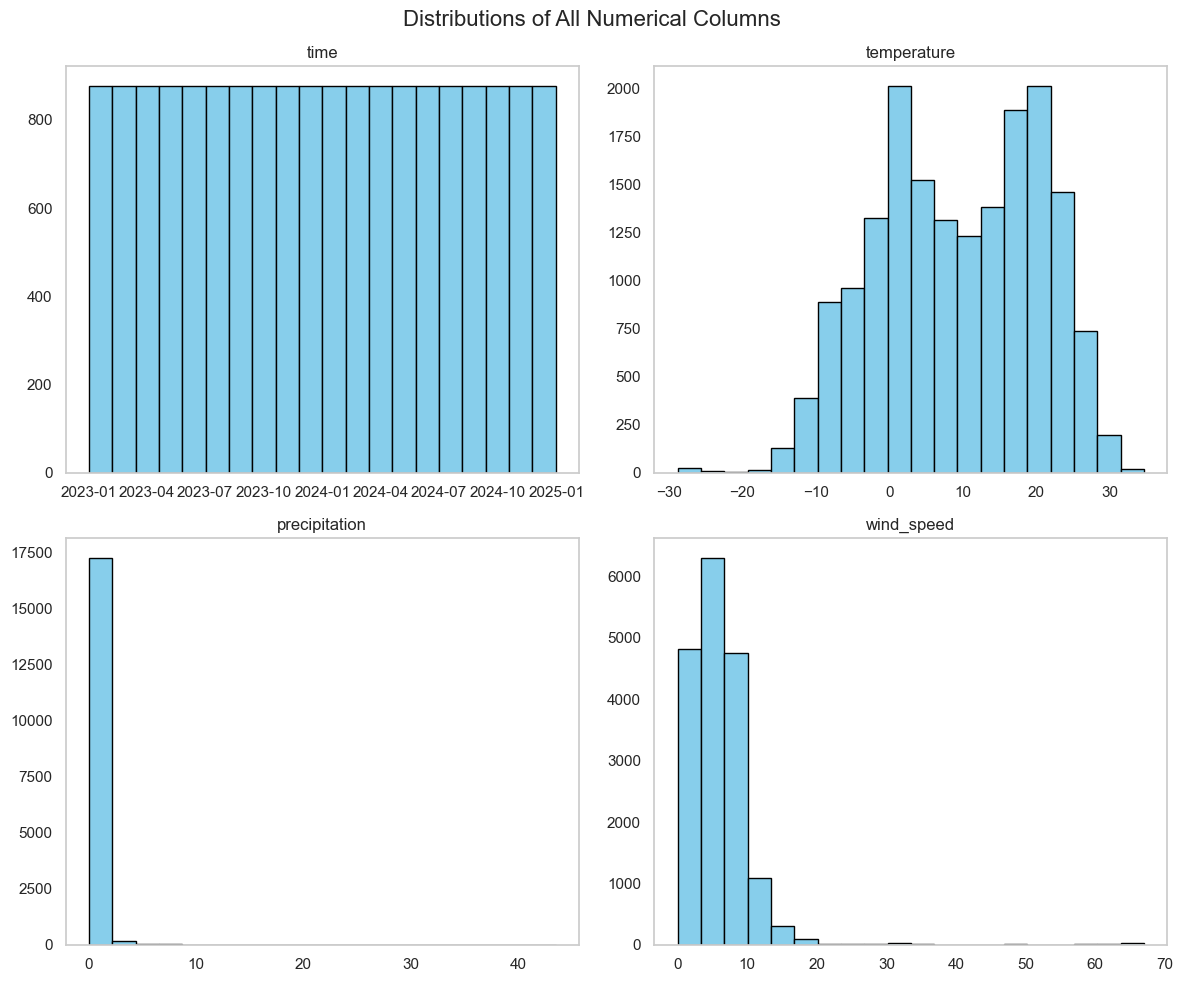

In [8]:

#~ generating a histogram for all numerical columns in weather_df 

weather_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black',grid=False)
plt.suptitle('Distributions of All Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()


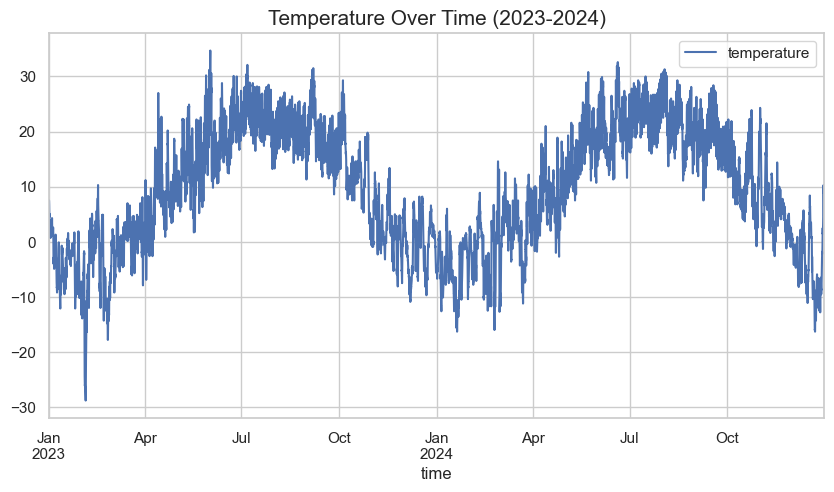

In [9]:

#~ showing temperature overtime

weather_df.plot(kind='line', x='time', y='temperature', figsize=(10, 5))

plt.title('Temperature Over Time (2023-2024)', fontsize=15)
plt.show()

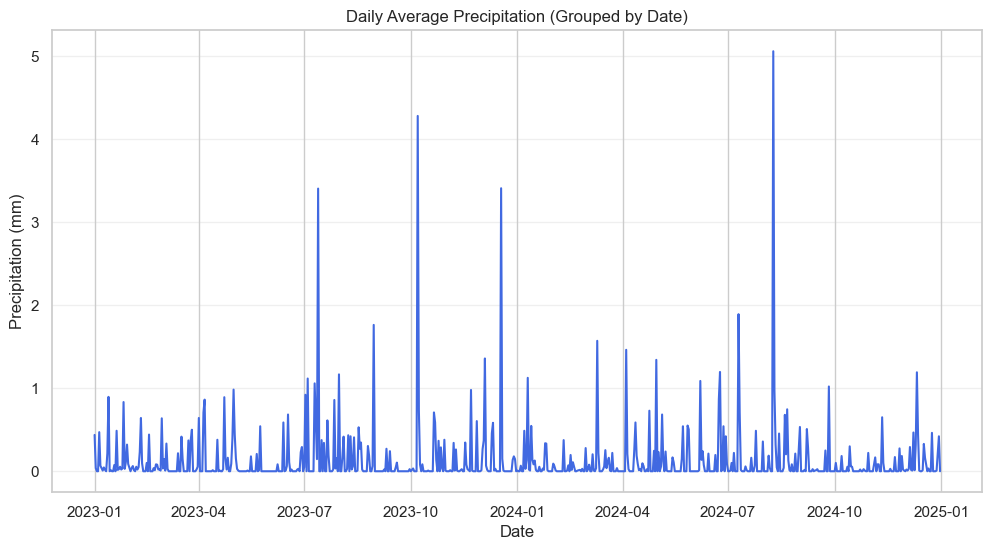

In [10]:

#~  showing precipitation over time

daily_precipitation = weather_df.groupby(weather_df['time'].dt.date)['precipitation'].mean()

daily_precipitation.plot(kind='line', figsize=(12, 6), color='royalblue')


plt.title('Daily Average Precipitation (Grouped by Date)')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.grid(axis='y', alpha=0.3)
plt.show()

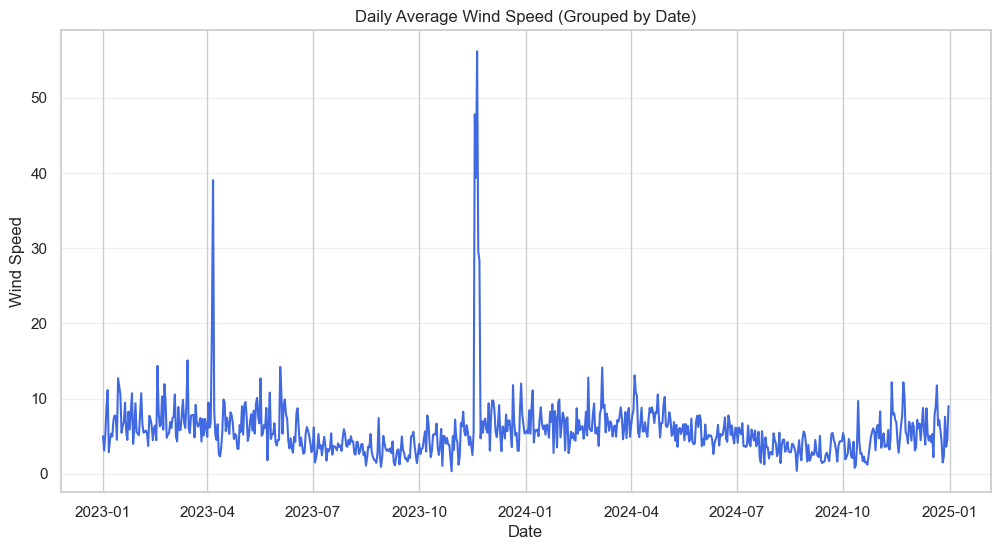

In [11]:

#~ Showing the daily average wind speed over time


daily_wind = weather_df.groupby(weather_df['time'].dt.date)['wind_speed'].mean()

daily_wind.plot(kind='line', figsize=(12, 6), color='royalblue')

plt.title('Daily Average Wind Speed (Grouped by Date)')
plt.ylabel('Wind Speed')
plt.xlabel('Date')
plt.grid(axis='y', alpha=0.3)
plt.show()

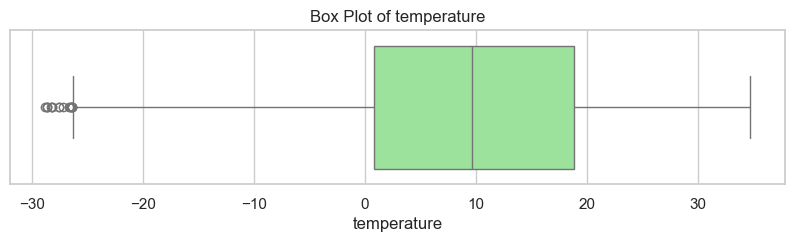

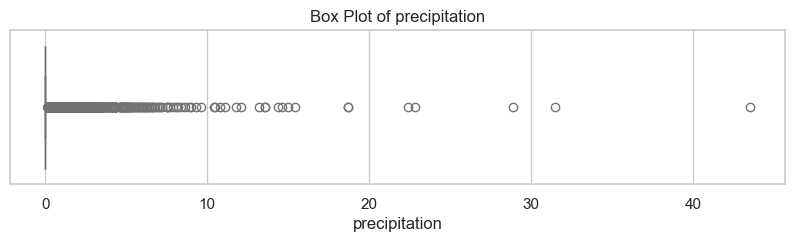

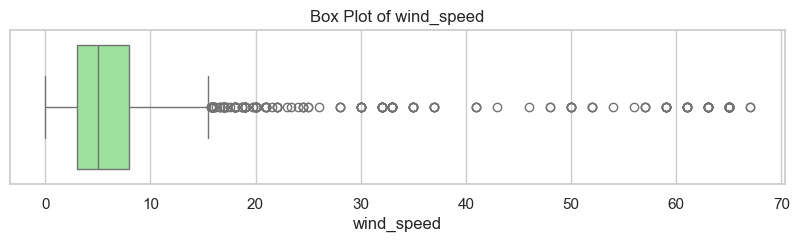

In [12]:

#~ Box plots for all numerical columns in weather_df

numeric_cols = weather_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=weather_df[col], color='lightgreen')
    
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

Exploratory Data Analysis for weather_df: 

As expected, temperature are hot during summer and colder during winter. 

There's more precipitation around summer and fall seasons (July to October)

Windspeed are higher during Fall to Winter seasons



# BIXI Trip DataFrame EDA

In [13]:
explore_data(bixi_trip_df)

Dataframe Shape: (24919302, 18)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24919302 entries, 0 to 24919301
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   startstationname            object        
 1   startstationarrondissement  object        
 2   startstationlatitude        float64       
 3   startstationlongitude       float64       
 4   endstationname              object        
 5   endstationarrondissement    object        
 6   endstationlatitude          float64       
 7   endstationlongitude         float64       
 8   starttime                   datetime64[ns]
 9   endtime                     datetime64[ns]
 10  start_hour                  int32         
 11  end_hour                    int32         
 12  start_day                   int64         
 13  end_day                     int64         
 14  start_dayofmonth            int32         
 15  end_dayofmonth 

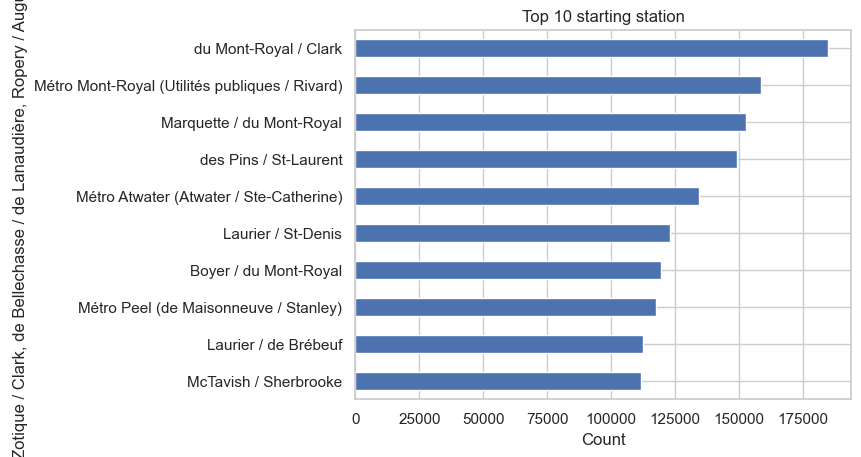

In [14]:


#~ counts of top 10 starting stations

top10_start_count = bixi_trip_df['startstationname'].value_counts().head(10).sort_values()

top10_start_count.plot(kind='barh', xlabel='Count', ylabel=bixi_trip_df['startstationname'], title='Top 10 starting station')
plt.tight_layout
plt.show()

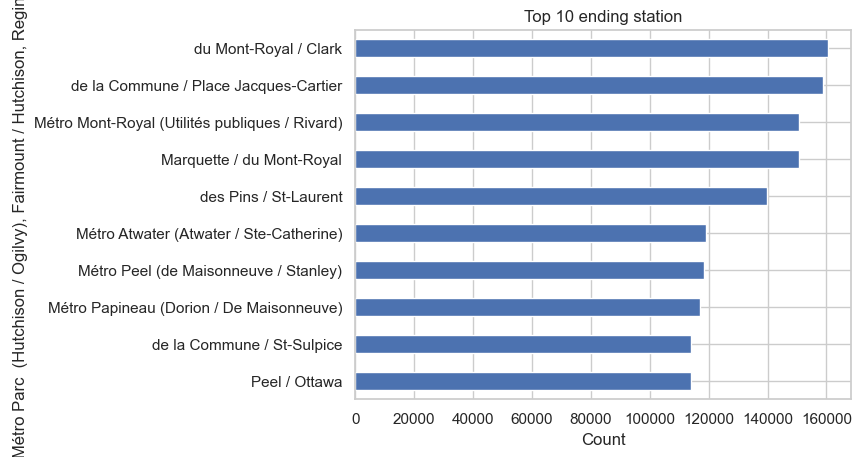

In [15]:

#~ counts of top 10 ending stations

top10_end_count = bixi_trip_df['endstationname'].value_counts().head(10).sort_values()

top10_end_count.plot(kind='barh', xlabel='Count', ylabel=bixi_trip_df['endstationname'], title='Top 10 ending station')
plt.tight_layout
plt.show()

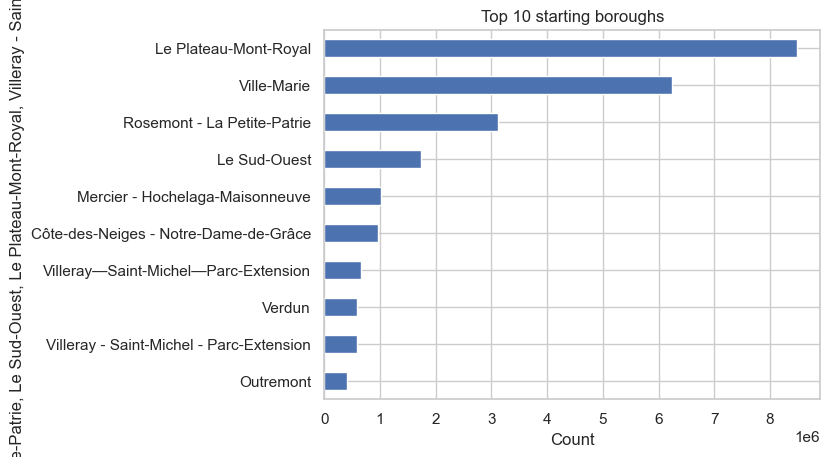

In [16]:


#~ counts of top 10 starting boroughs

top10_startBor_count = bixi_trip_df['startstationarrondissement'].value_counts().head(10).sort_values()

top10_startBor_count.plot(kind='barh', xlabel='Count', ylabel=bixi_trip_df['startstationarrondissement'], title='Top 10 starting boroughs')
plt.tight_layout
plt.show()

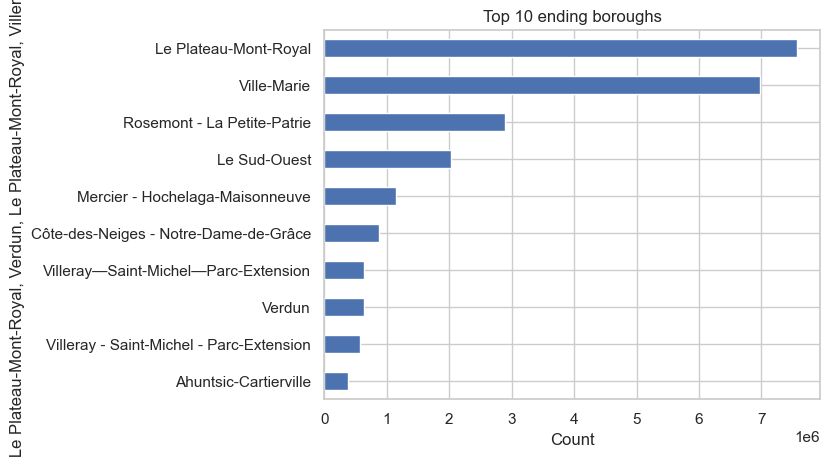

In [17]:

#~ counts of top 10 ending boroughs

top10_endBor_count = bixi_trip_df['endstationarrondissement'].value_counts().head(10).sort_values()

top10_endBor_count.plot(kind='barh', xlabel='Count', ylabel=bixi_trip_df['endstationarrondissement'], title='Top 10 ending boroughs')
plt.tight_layout
plt.show()

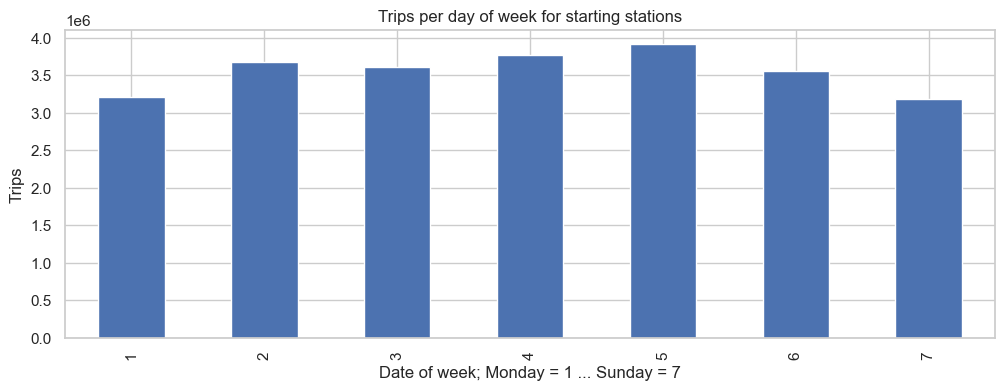

In [18]:

#~ bar chart to discover most popular day of week of trips for starting station

daily_counts_start = (bixi_trip_df['start_day'].value_counts().sort_index())

ax = daily_counts_start.plot.bar(figsize=(12,4), rot=90)
ax.set_xlabel("Date of week; Monday = 1 ... Sunday = 7")
ax.set_ylabel("Trips")
ax.set_title("Trips per day of week for starting stations")
plt.show()

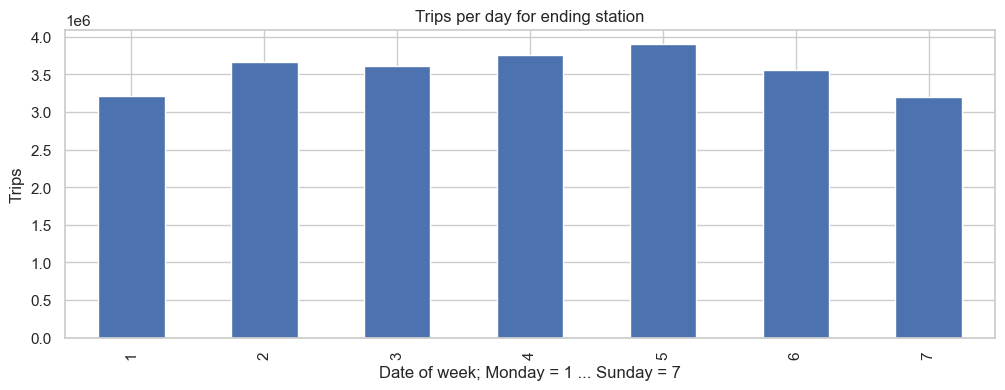

In [19]:

#~ bar chart to discover most popular day of week of trips for ending station

daily_counts_end = (bixi_trip_df['end_day'].value_counts().sort_index())

ax = daily_counts_end.plot.bar(figsize=(12,4), rot=90)
ax.set_xlabel("Date of week; Monday = 1 ... Sunday = 7")
ax.set_ylabel("Trips")
ax.set_title("Trips per day for ending station")
plt.show()

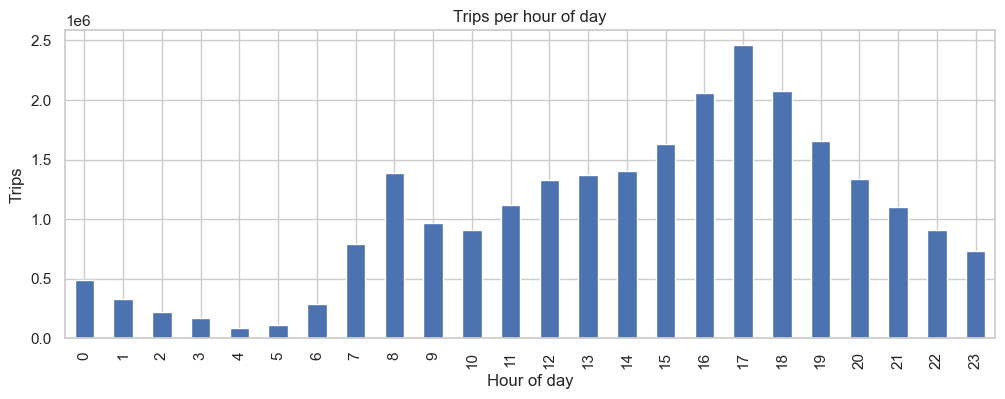

In [20]:

#~ looking at the trips for each hour for starting station

hourly_counts_start = (bixi_trip_df['start_hour'].value_counts().sort_index())

ax = hourly_counts_start.plot.bar(figsize=(12,4), rot=90)
ax.set_xlabel("Hour of day")
ax.set_ylabel("Trips")
ax.set_title("Trips per hour of day")
plt.show()

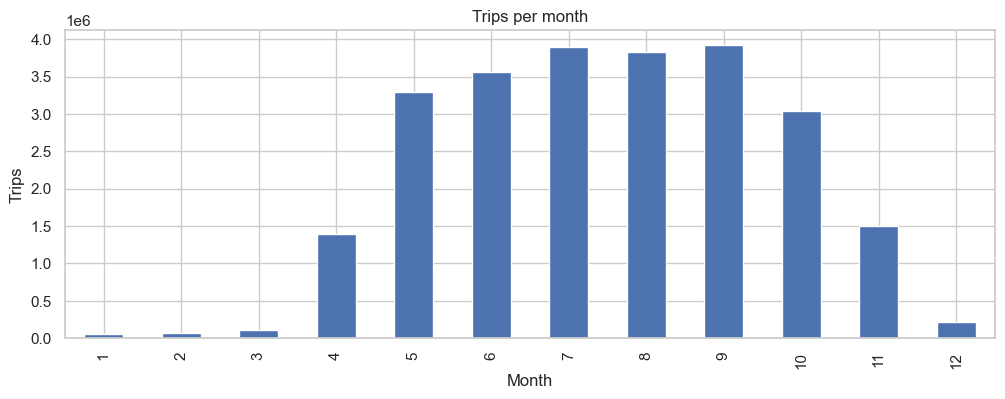

In [21]:

#~ bar chart to discover most popular  month of trips 

daily_counts_startmonth = (bixi_trip_df['start_month'].value_counts().sort_index())

ax = daily_counts_startmonth.plot.bar(figsize=(12,4), rot=90)
ax.set_xlabel("Month")
ax.set_ylabel("Trips")
ax.set_title("Trips per month")
plt.show()